In [1]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
startup = pd.read_csv('../Assignment 5-Multi Linear Regression/50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup1 = startup.copy()

In [5]:
# Convert State variable to dummy variables
startup = pd.get_dummies(startup, columns=['State'], drop_first=True)

In [6]:
# Predictor variables
X = startup[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
# Add intercept
X = sm.add_constant(X)
# Outcome variable
y = startup['Profit']

In [7]:
# Correlation matrix
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 const  R&D Spend  Administration  Marketing Spend  \
const              NaN        NaN             NaN              NaN   
R&D Spend          NaN   1.000000        0.241955         0.724248   
Administration     NaN   0.241955        1.000000        -0.032154   
Marketing Spend    NaN   0.724248       -0.032154         1.000000   
State_Florida      NaN   0.105711        0.010493         0.205685   
State_New York     NaN   0.039068        0.005145        -0.033670   

                 State_Florida  State_New York  
const                      NaN             NaN  
R&D Spend             0.105711        0.039068  
Administration        0.010493        0.005145  
Marketing Spend       0.205685       -0.033670  
State_Florida         1.000000       -0.492366  
State_New York       -0.492366        1.000000  


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
         Variables        VIF
0            const  26.600153
1        R&D Spend   2.495511
2   Administration   1.177766
3  Marketing Spend   2.416797
4    State_Florida   1.387641
5   State_New York   1.335061


In [9]:
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

In [10]:
# Model summary
print("\nModel Summary:")
print(model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.34e-27
Time:                        16:24:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.013e+04

In [11]:
# Check for influential points using Cook's distance
influence = model.get_influence()
summary_frame = influence.summary_frame()
print("\nInfluence Summary:")
print(summary_frame)


Influence Summary:
    dfb_const  dfb_R&D Spend  dfb_Administration  dfb_Marketing Spend  \
0    0.002627      -0.000680           -0.001084            -0.002943   
1   -0.049608       0.020841            0.046268             0.058280   
2    0.080109       0.197811           -0.174765            -0.013702   
3   -0.035947       0.110000           -0.049701             0.073783   
4   -0.104342      -0.153851            0.163418             0.047737   
5   -0.046292      -0.081405            0.105665            -0.033055   
6   -0.021299      -0.095187            0.004676             0.082074   
7    0.056695      -0.045130           -0.041183             0.001538   
8   -0.010483       0.000992            0.008446             0.005091   
9   -0.073333      -0.087676            0.064819             0.009105   
10   0.116978       0.186811           -0.137400            -0.159583   
11   0.226735       0.152695           -0.197500            -0.063320   
12  -0.017490       0.069420   

In [12]:
# Assess model fit
print("\nAdjusted R-squared:", model.rsquared_adj)
print("AIC:", model.aic)
print("BIC:", model.bic)


Adjusted R-squared: 0.945156175737278
AIC: 1062.764909597834
BIC: 1074.237047630403


In [13]:
## Scatterplot between variables along with Histograms

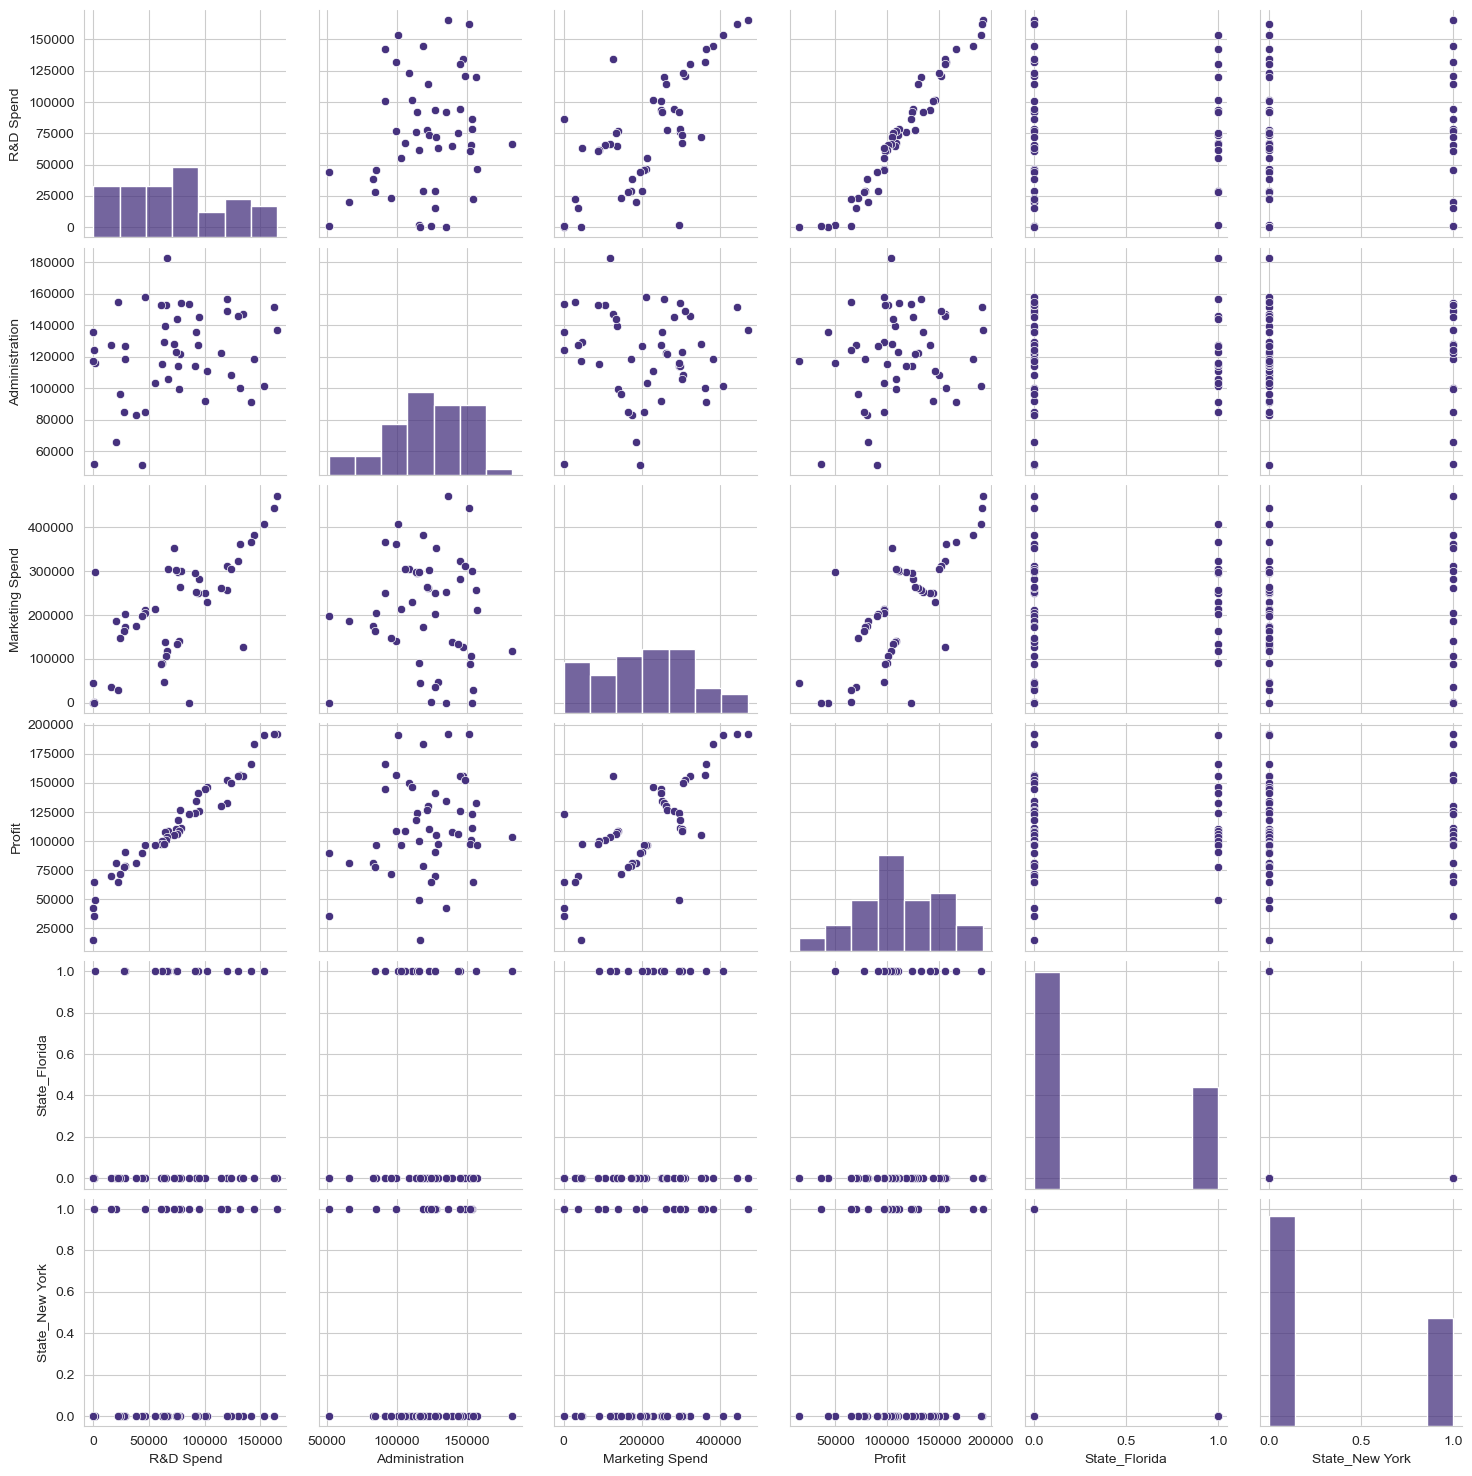

In [14]:
# Format the plot background and scatter plots for all the variables
sns.set_palette('viridis')

sns.set_style(style='whitegrid')
sns.pairplot(startup)
plt.show()

In [15]:
startup.rename(columns={"R&D Spend":"RandDspend","Marketing Spend":"marketspend"},inplace=True)

In [16]:
startup.isna().sum()

RandDspend        0
Administration    0
marketspend       0
Profit            0
State_Florida     0
State_New York    0
dtype: int64

## Preparing a model

In [17]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RandDspend+marketspend+Administration', data=startup).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        16:24:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandDspend         0.8057      0.045     17.846      0.000       0.715       0.897
marketspend        0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#coefficients
model.params

Intercept         50122.192990
RandDspend            0.805715
marketspend           0.027228
Administration       -0.026816
dtype: float64

In [20]:
#t and p values
model.tvalues

Intercept          7.626218
RandDspend        17.846374
marketspend        1.655077
Administration    -0.525507
dtype: float64

In [21]:
model.pvalues

Intercept         1.057379e-09
RandDspend        2.634968e-22
marketspend       1.047168e-01
Administration    6.017551e-01
dtype: float64

In [22]:
# R sqaured values
model.rsquared

0.9507459940683246

In [23]:
model.rsquared_adj

0.9475337762901719

In [24]:
model1 = smf.ols("Profit~Administration+marketspend",data = startup).fit() #w3
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.50e-10
Time:                        16:24:14   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
marketspend        0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Administration and Marketspend has greater than 0.05 values

In [26]:
model2 = smf.ols("Profit~Administration+RandDspend",data = startup).fit() #w2
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           7.29e-31
Time:                        16:24:14   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
RandDspend         0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#So we have to find the correlation between x features

In [28]:
mx1 = smf.ols("Administration~marketspend+RandDspend", data=startup).fit()
mx1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Administration   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.115
Date:                Sun, 31 Mar 2024   Prob (F-statistic):             0.0226
Time:                        16:24:14   Log-Likelihood:                -578.44
No. Observations:                  50   AIC:                             1163.
Df Residuals:                      47   BIC:                             1169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.173e+05   7749.035     15.141      0.000    1.02e+05    1.33e+05
marketspend    -0.0999      0.045     -2.235      0.030      -0.190      -0.010
RandDspend      0.3405      0.119      2.859      0.006       0.101       0.580
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.351
Skew:                          -0.401   Prob(JB):                        0.509
Kurtosis:                       2.936   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#here Administration and markekspend getting greater then 0.05 values

In [30]:
mx1rsquared = mx1.rsquared
vif_M_R_mx1 = 1/(1-mx1rsquared)

In [31]:
vif_M_R_mx1

1.1750910070550453

In [32]:
mx2=smf.ols("marketspend~Administration+RandDspend",data=startup).fit()
mx2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            marketspend   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     31.18
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.41e-09
Time:                        16:24:15   Log-Likelihood:                -635.04
No. Observations:                  50   AIC:                             1276.
Df Residuals:                      47   BIC:                             1282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.75e+05   5.24e+04      3.340      0.002    6.96e+04     2.8e+05
Administration    -0.9615      0.430     -2.235      0.030      -1.827      -0.096
RandDspend         2.0715      0.263      7.890      0.000       1.543       2.600
==============================================================================
Omnibus:                        2.504   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.286   Jarque-Bera (JB):                1.797
Skew:                          -0.035   Prob(JB):                        0.407
Kurtosis:                       3.926   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
mx2rsquared = mx2.rsquared
vif_M_R_mx2 = 1/(1-mx2rsquared)

In [34]:
vif_M_R_mx2

2.3267732905308773

In [35]:
mx3=smf.ols("RandDspend~Administration+marketspend",data=startup).fit()
mx3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RandDspend   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     34.52
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           5.97e-10
Time:                        16:24:15   Log-Likelihood:                -584.56
No. Observations:                  50   AIC:                             1175.
Df Residuals:                      47   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.711e+04   2.05e+04     -1.807      0.077   -7.84e+04    4199.950
Administration     0.4350      0.152      2.859      0.006       0.129       0.741
marketspend        0.2751      0.035      7.890      0.000       0.205       0.345
==============================================================================
Omnibus:                        3.767   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.001
Skew:                          -0.311   Prob(JB):                        0.223
Kurtosis:                       4.027   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
mx3rsquared = mx3.rsquared
vif_M_R_mx3 = 1/(1-mx3rsquared)

In [37]:
vif_M_R_mx3

2.4689030699947017

In [38]:
vif_df={"variables":["Administration","marketspend","RandDsepend"],"vif":[vif_M_R_mx1,vif_M_R_mx2,vif_M_R_mx3]}
vif_data = pd.DataFrame(vif_df)
vif_data

,variables,vif
0,Administration,1.175091
1,marketspend,2.326773
2,RandDsepend,2.468903


## Simple Linear Regression Models

In [39]:
ml_Admins =  smf.ols('Profit~RandDspend+Administration', data=startup).fit()
ml_Admins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           7.29e-31
Time:                        16:24:15   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RandDspend         0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
ml_Admins.aic

1059.6636934567293

In [41]:
ml_Admins.rsquared

0.9478129385009173

In [42]:
ml_MarketSpend =  smf.ols('Profit~marketspend+RandDspend', data=startup).fit()
ml_MarketSpend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           2.16e-31
Time:                        16:24:15   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
marketspend     0.0299      0.016      1.927      0.060      -0.001       0.061
RandDspend      0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
ml_MarketSpend.aic

1057.070772191826

In [44]:
ml_MarketSpend.rsquared

0.9504503015559763

# Residual Analysis

In [45]:
#test for normality

In [46]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

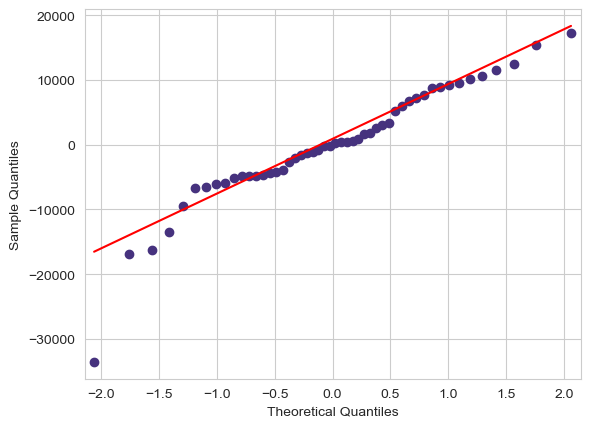

In [47]:
qqplot=sm.qqplot(model.resid,line="q")

In [48]:
list((np.where(model.resid> 15000)) and (np.where(model.resid < -15000)))

[array([14, 15, 49], dtype=int64)]

In [49]:
def standardized(v):
  eqn = (v-v.mean())/v.std()
  return eqn

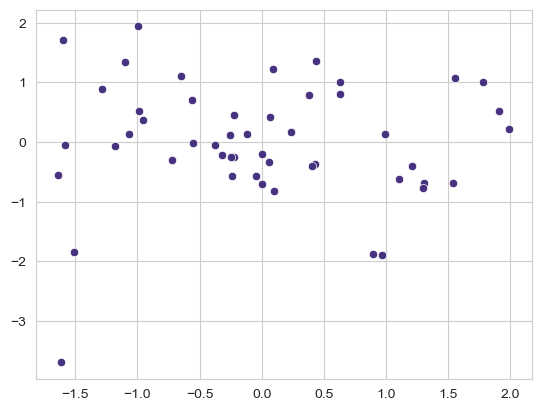

In [50]:
sns.scatterplot(x=standardized(ml_Admins.fittedvalues),y=standardized(ml_Admins.resid))
plt.xlabel=("standardized fitted values")
plt.ylabel=("standardized fitted values")

## Residual Vs Regression

eval_env: 1


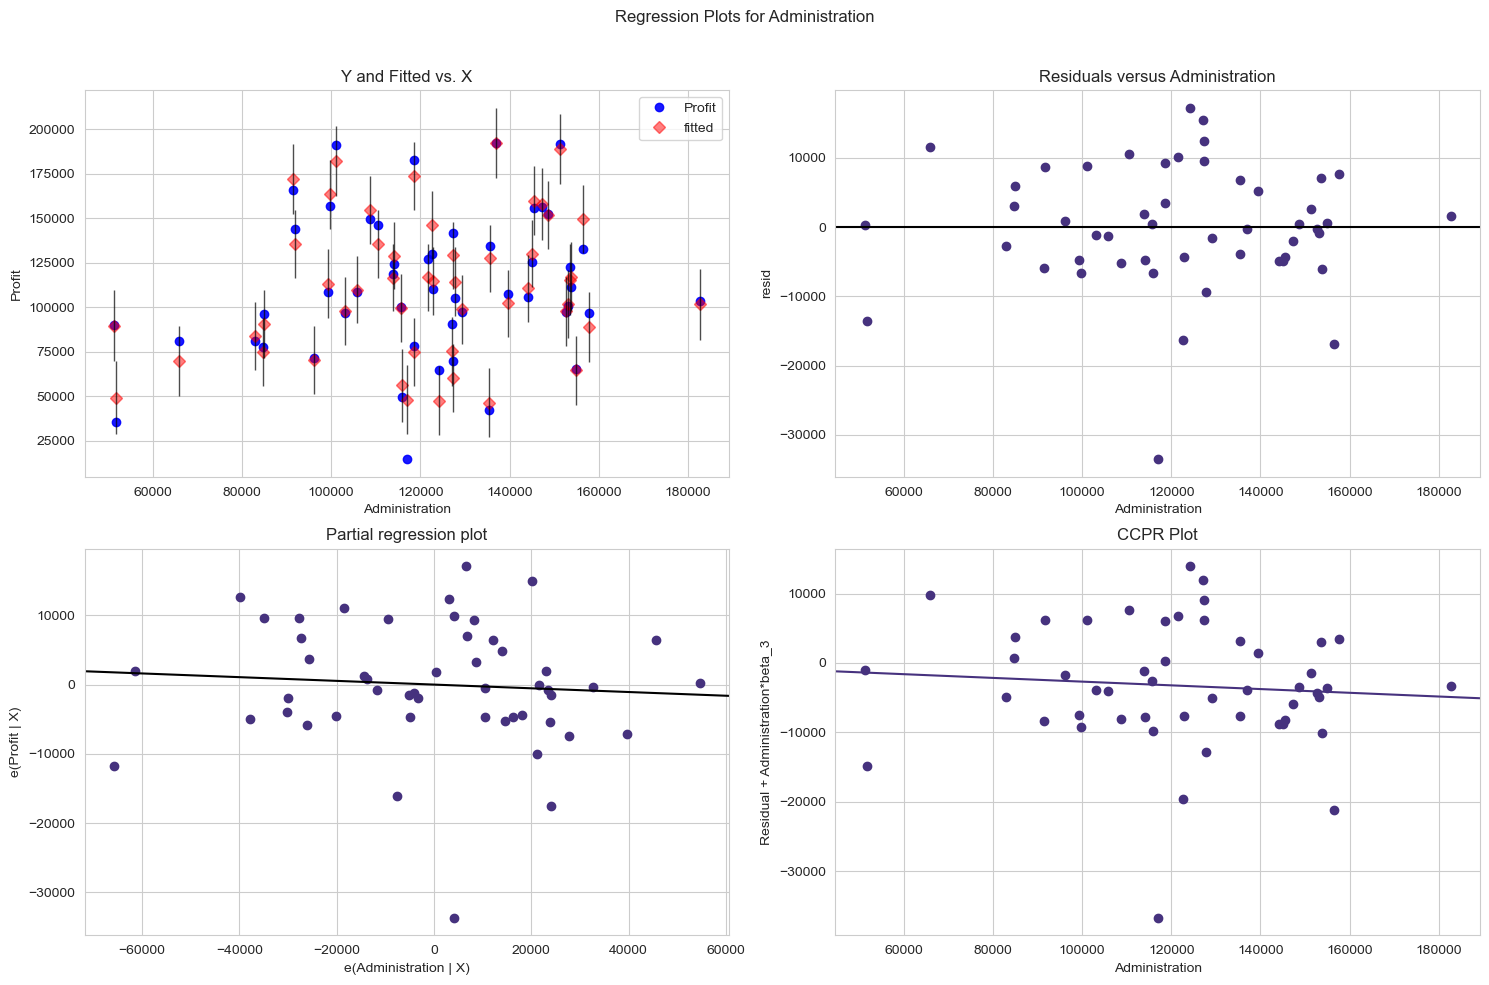

In [51]:
fig1=plt.figure(figsize=(15,10))
fig1=sm.graphics.plot_regress_exog(model,"Administration",fig=fig1)
plt.show()

eval_env: 1


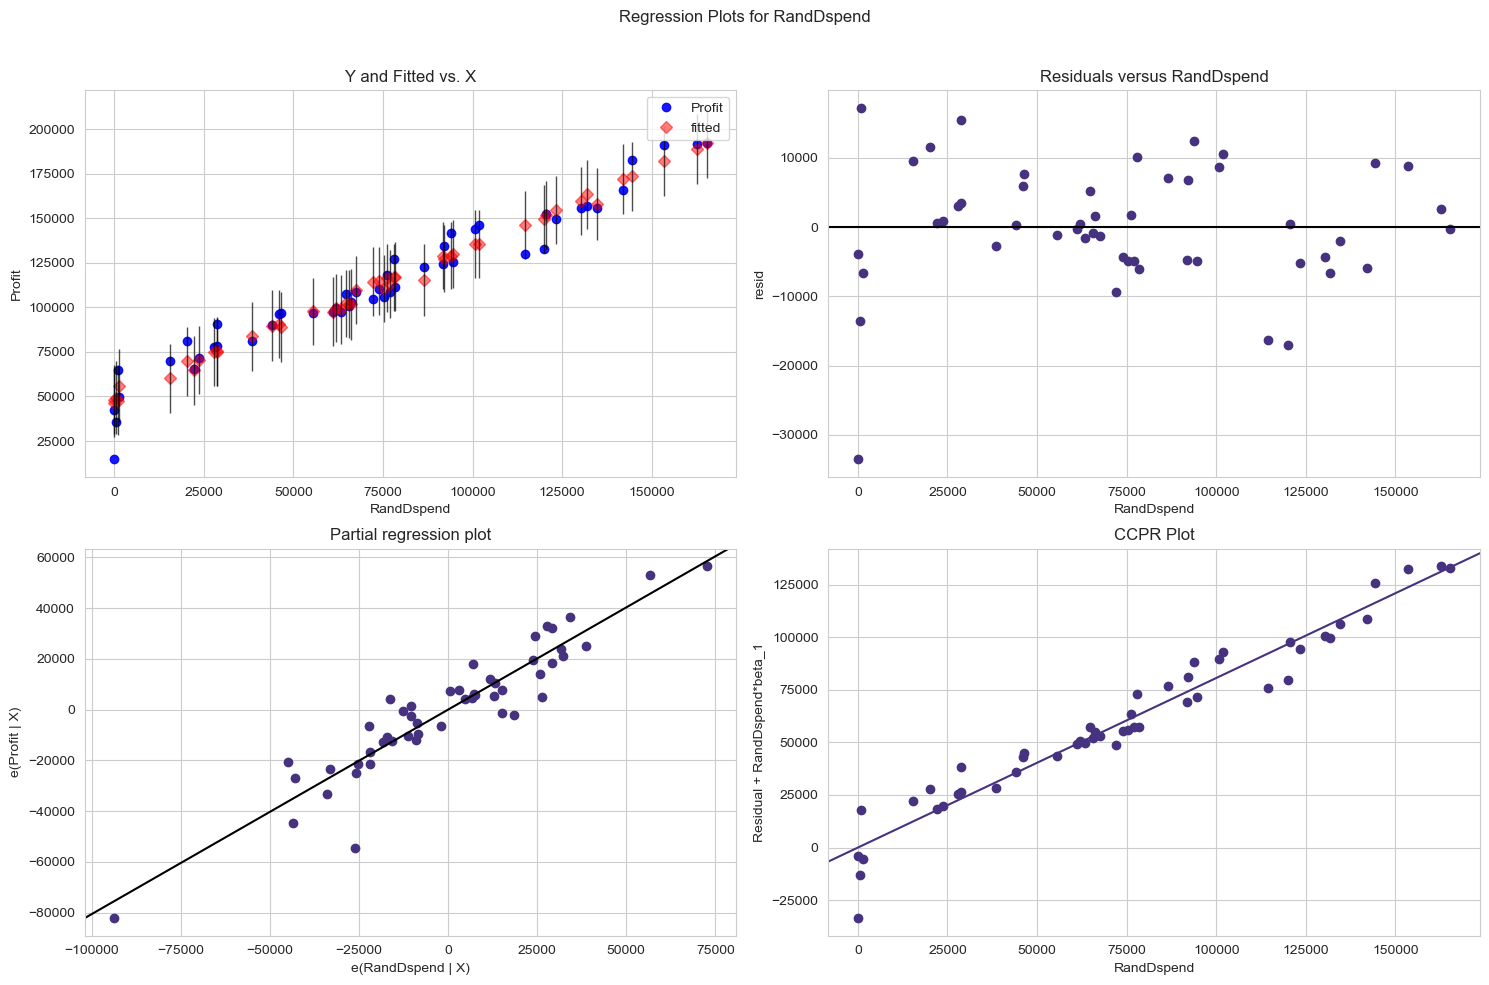

In [52]:
fig2=plt.figure(figsize=(15,10))
fig2=sm.graphics.plot_regress_exog(model,"RandDspend",fig=fig2)
plt.show()

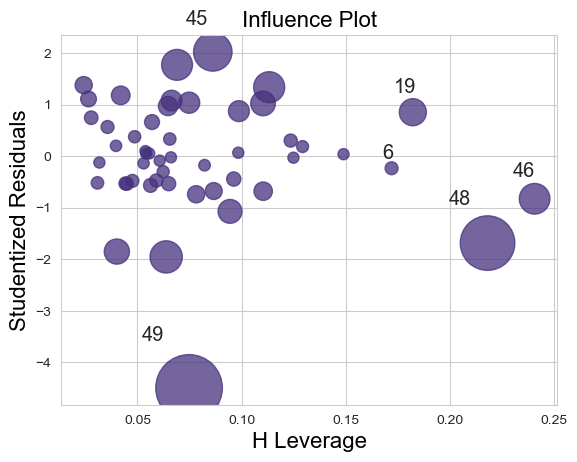

In [53]:
influence_plot(model)
plt.show()

In [54]:
startup.shape

(50, 6)

In [55]:
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=2*((k+1)/n)
leverage_cutoff

0.28

## Detecting Influencers/outliers
## Cooks Distance

In [56]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

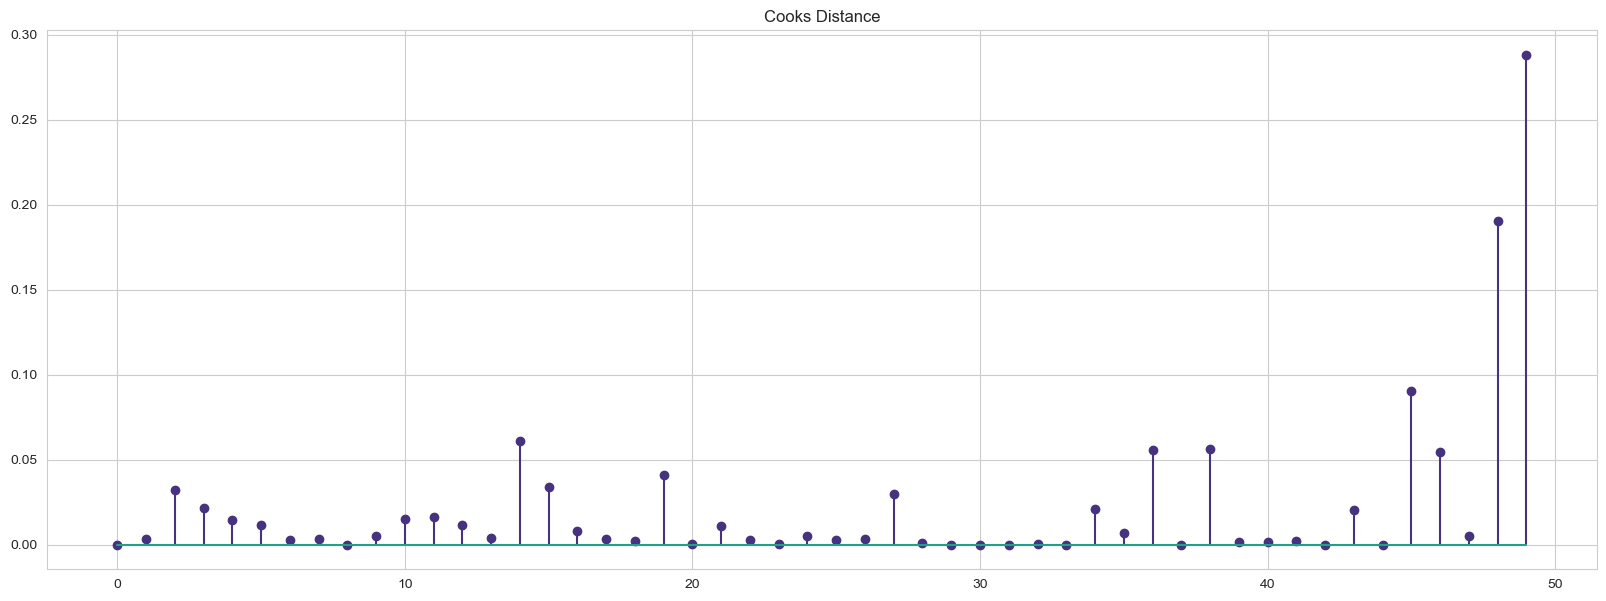

In [57]:
#Plot the influence values using stem plot
fig3=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.title('Cooks Distance')
plt.show()

In [58]:
#index and value of influcers where c is more tha .5
np.argmax(c),np.max(c)

(49, 0.2880822927543268)

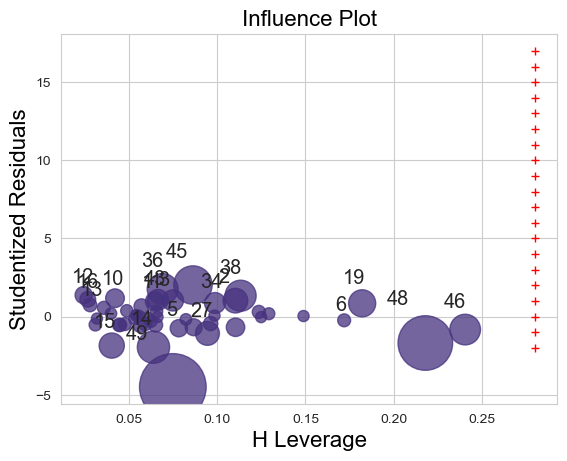

In [59]:
influence_plot(model,alpha=0.5)
y=[i for i in range(-2,18)]
x=[leverage_cutoff for i in range(20)]
plt.plot(x,y,"r+")
plt.show()

In [60]:
## From above ploat it is evident that data point in 49 are influencers.. Remove 49th Point

In [61]:
startup[startup.index.isin([46,48,49])]

,RandDspend,Administration,marketspend,Profit,State_Florida,State_New York
46,1315.46,115816.21,297114.46,49490.75,1,0
48,542.05,51743.15,0.00,35673.41,0,1
49,0.00,116983.80,45173.06,14681.40,0,0


In [62]:
startup1 = startup.drop(startup.index[[49,48,46]],axis=0).reset_index()

In [63]:
startup1.tail()

,index,RandDspend,Administration,marketspend,Profit,State_Florida,State_New York
42,42,23640.93,96189.63,148001.11,71498.49,0,0
43,43,15505.73,127382.30,35534.17,69758.98,0,1
44,44,22177.74,154806.14,28334.72,65200.33,0,0
45,45,1000.23,124153.04,1903.93,64926.08,0,1
46,47,0.00,135426.92,0.00,42559.73,0,0


#### Build the model after dropping 46,48 and 49

In [64]:
final_model = smf.ols("Profit~marketspend+RandDspend",data=startup1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.65e-31
Time:                        16:24:19   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
marketspend     0.0323      0.014      2.376      0.022       0.005       0.060
RandDspend      0.7439      0.037     19.902      0.000       0.669       0.819
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
final_model2=final_model.get_influence()
(c_v,_)=final_model2.cooks_distance

<StemContainer object of 3 artists>

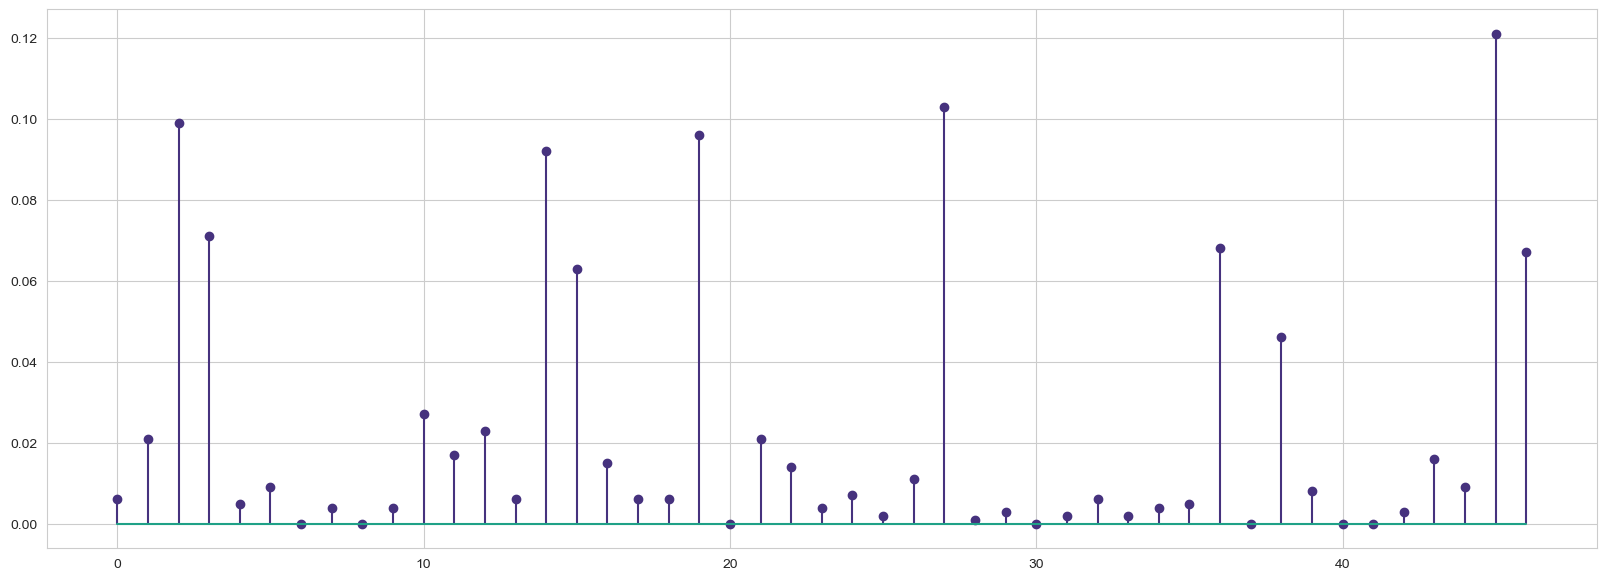

In [66]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_v,3))

In [67]:
np.argmax(c_v),np.max(c_v)

(45, 0.12080904032647992)

In [68]:
final_model.rsquared,final_model.aic

(0.9601156240945742, 972.8030903954614)